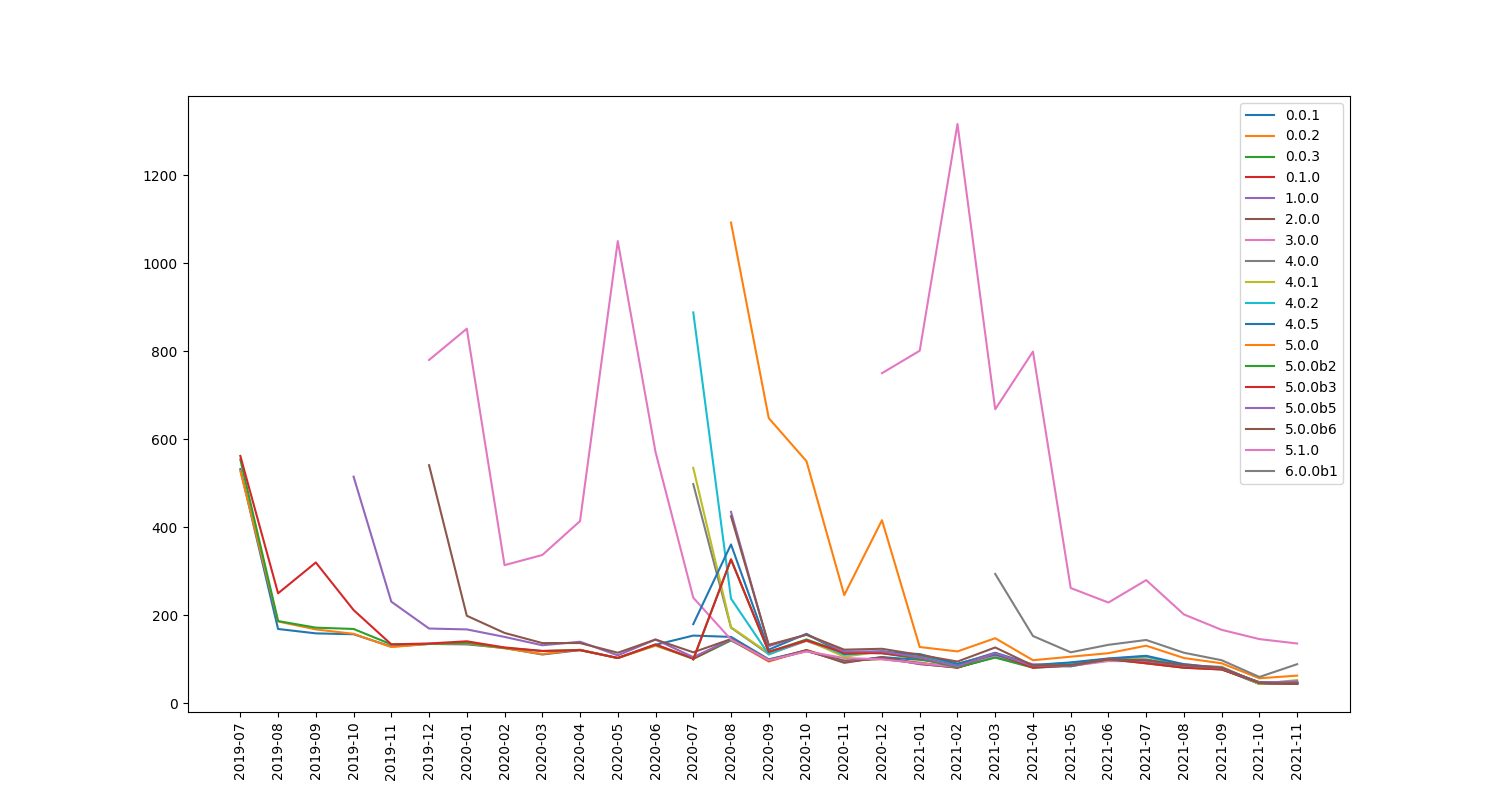

In [57]:
%matplotlib widget
import matplotlib.pyplot as plt
import json
from pathlib import Path

plt.rcParams["figure.figsize"] = 15,8

table = {}
versions = set()

for file in Path('data/pypi').glob('*'):
    row = {}
    with file.open() as f:
        data = json.load(f)
    for col in data:
        row[col['version']] = col['count']
        versions.add(col['version'])
    table['-'.join(file.stem.split('-')[0:2])] = row

versions = sorted(versions)
    
for version in versions:
    for row_name in table:
        row = table[row_name]
        # TODO: Instead of always None, if the version has been released, set it to `0`, otherwise `None`.
        #       Right now this changes nothing. In the future, that might not be the case.
        row[version] = row.get(version, None)

rows_for_version = lambda version: [row[version] for row in table.values()]

dates = table.keys()

for version in versions:
    plt.plot(dates, rows_for_version(version), label=version)

plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.show()